# 2D UNETR for Kidney Segmentation(KiTS21)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir KiTS21

In [3]:
!unzip /content/drive/MyDrive/KiTS21/train-kid-small.zip -d ./KiTS21/train


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./KiTS21/train/labels/090_028.png  
  inflating: ./KiTS21/train/labels/090_029.png  
  inflating: ./KiTS21/train/labels/090_030.png  
  inflating: ./KiTS21/train/labels/090_031.png  
  inflating: ./KiTS21/train/labels/090_032.png  
  inflating: ./KiTS21/train/labels/090_033.png  
  inflating: ./KiTS21/train/labels/090_034.png  
  inflating: ./KiTS21/train/labels/090_035.png  
  inflating: ./KiTS21/train/labels/090_036.png  
  inflating: ./KiTS21/train/labels/090_037.png  
  inflating: ./KiTS21/train/labels/090_038.png  
  inflating: ./KiTS21/train/labels/090_039.png  
  inflating: ./KiTS21/train/labels/090_040.png  
  inflating: ./KiTS21/train/labels/090_041.png  
  inflating: ./KiTS21/train/labels/090_042.png  
  inflating: ./KiTS21/train/labels/090_043.png  
  inflating: ./KiTS21/train/labels/090_044.png  
  inflating: ./KiTS21/train/labels/090_045.png  
  inflating: ./KiTS21/train/labels/090_046.png  
  inflating: ./KiTS21/train/label

In [4]:
!unzip /content/drive/MyDrive/KiTS21/test-small.zip -d ./KiTS21/test

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./KiTS21/test/masks/259_025.png  
  inflating: ./KiTS21/test/masks/259_026.png  
  inflating: ./KiTS21/test/masks/259_027.png  
  inflating: ./KiTS21/test/masks/259_028.png  
  inflating: ./KiTS21/test/masks/259_029.png  
  inflating: ./KiTS21/test/masks/259_030.png  
  inflating: ./KiTS21/test/masks/259_031.png  
  inflating: ./KiTS21/test/masks/259_032.png  
  inflating: ./KiTS21/test/masks/259_033.png  
  inflating: ./KiTS21/test/masks/259_034.png  
  inflating: ./KiTS21/test/masks/259_035.png  
  inflating: ./KiTS21/test/masks/259_036.png  
  inflating: ./KiTS21/test/masks/259_037.png  
  inflating: ./KiTS21/test/masks/259_038.png  
 extracting: ./KiTS21/test/masks/259_039.png  
 extracting: ./KiTS21/test/masks/259_040.png  
 extracting: ./KiTS21/test/masks/259_041.png  
  inflating: ./KiTS21/test/masks/259_042.png  
  inflating: ./KiTS21/test/masks/259_043.png  
 extracting: ./KiTS21/test/masks/259_044.png  
 extracting: ./KiTS21/te

## Dataset

Unique label values: [  0   1   2   3   5   7   8   9  10  11  12  15  16  17  18  19  20  22
  23  24  25  26  32  57  58  65  66  67  68  71  72  73  74  78  79  80
  81  89 105 110 112 113 114 115 116 118 120 121 123 124 125 126 127 128
 129 130 133 135 143 172 175 176 177 178 179 182 183 184 185 188 189 190
 191 199 218 226 231 232 233 234 235 236 237 238 239 240 241 243 244 245
 246 247 248 252 253 254 255]


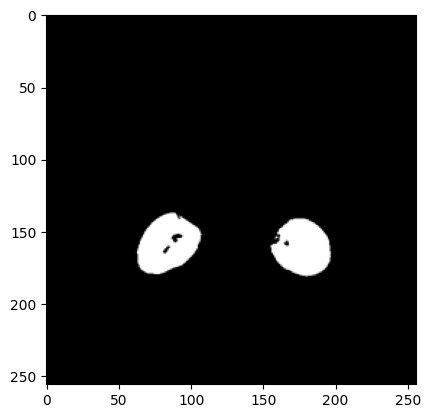

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = '/content/KiTS21/train/images/023_055.png'
label_path = '/content/KiTS21/train/labels/023_055.png'
# 레이블 파일 불러오기
label = cv2.imread(label_path, cv2.IMREAD_GRAYSCALE)
unique_values = np.unique(label)
print("Unique label values:", unique_values)  # [0, 1]이 나와야 함

# 시각화
plt.imshow(label, cmap='gray')
plt.show()

In [9]:
# Get unique values and their counts
unique_values, counts = np.unique(label, return_counts=True)

# Print the results
for value, count in zip(unique_values, counts):
    print(f"Label {value}: {count} pixels")

Label 0: 62790 pixels
Label 1: 8 pixels
Label 2: 4 pixels
Label 3: 12 pixels
Label 5: 2 pixels
Label 7: 3 pixels
Label 8: 1 pixels
Label 9: 8 pixels
Label 10: 10 pixels
Label 11: 20 pixels
Label 12: 3 pixels
Label 15: 12 pixels
Label 16: 7 pixels
Label 17: 19 pixels
Label 18: 7 pixels
Label 19: 1 pixels
Label 20: 1 pixels
Label 22: 17 pixels
Label 23: 2 pixels
Label 24: 4 pixels
Label 25: 1 pixels
Label 26: 2 pixels
Label 32: 1 pixels
Label 57: 1 pixels
Label 58: 1 pixels
Label 65: 1 pixels
Label 66: 4 pixels
Label 67: 1 pixels
Label 68: 2 pixels
Label 71: 11 pixels
Label 72: 11 pixels
Label 73: 2 pixels
Label 74: 2 pixels
Label 78: 14 pixels
Label 79: 4 pixels
Label 80: 6 pixels
Label 81: 2 pixels
Label 89: 1 pixels
Label 105: 1 pixels
Label 110: 1 pixels
Label 112: 1 pixels
Label 113: 1 pixels
Label 114: 1 pixels
Label 115: 1 pixels
Label 116: 2 pixels
Label 118: 1 pixels
Label 120: 4 pixels
Label 121: 1 pixels
Label 123: 2 pixels
Label 124: 1 pixels
Label 125: 2 pixels
Label 126: 3 

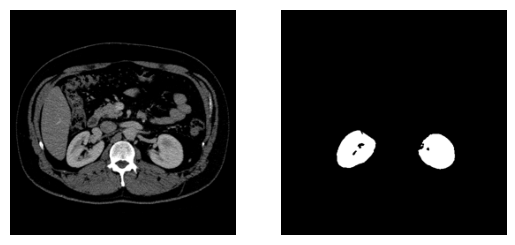

label unique value: [  0   1   2   3   5   7   8   9  10  11  12  15  16  17  18  19  20  22
  23  24  25  26  32  57  58  65  66  67  68  71  72  73  74  78  79  80
  81  89 105 110 112 113 114 115 116 118 120 121 123 124 125 126 127 128
 129 130 133 135 143 172 175 176 177 178 179 182 183 184 185 188 189 190
 191 199 218 226 231 232 233 234 235 236 237 238 239 240 241 243 244 245
 246 247 248 252 253 254 255]


In [11]:
from PIL import Image

img = np.asarray(Image.open(image_path))
label = np.asarray(Image.open(label_path))

fig, axes = plt.subplots(1, 2)
axes[0].set_axis_off()
axes[0].imshow(img, cmap='gray')
axes[1].set_axis_off()
axes[1].imshow(label, cmap='gray')
plt.show()
print('label unique value:', np.unique(label))